# Ejercicios | Data Clustering

Vamos a ejercitar nuestro aprendizaje de lo que aprendimos. Solamente usar Kmeans o DBSCAN. Para los datasets sintéticos que les presentamos abajo:

 - elegir el método más apropriado para cada dataset para encontrar clusters y etiquetar datos
 - encontrar los mejores valores de los parámetros variables del método en cada caso (k para K-Means, eps y min_samples para DBSCAN)
 - reportar una o más métricas de performance (calidad) de los agrupamientos obtenidos. 

Si no tienen mucho tiempo o van más lento, hagan uno o dos datasets, pero a conciencia! Les dejamos varios datasets para los que van mas rapido o tienen más tiempo!

In [1]:
# ejecutar para setear el numero de datos
n_samples = 500

from sklearn import cluster, datasets, mixture
import numpy as np

## Cuidado!

En todas las celdas usamos la misma variable `x` para guardar el conjunto de datos (cada fila tiene dos valores apareados, que podemos plotear).



In [ ]:
#@title Generar dataset 1

from sklearn import cluster, datasets, mixture
import numpy as np

np.random.seed(3)
n_samples = 500
x, y = datasets.make_circles(n_samples=n_samples, factor=0.2, noise=0.09)

In [ ]:
#@title Generar dataset 2

from sklearn import cluster, datasets, mixture
import numpy as np

np.random.seed(13)
n_samples = 500
x, y = datasets.make_moons(n_samples=n_samples, noise=0.09, shuffle=False)

In [ ]:
#@title Generar dataset 3

x,y = datasets.make_blobs(n_samples=n_samples, random_state=13)

In [3]:
#@title Generar dataset 4

random_state = 5109
a, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.7]]
x = np.dot(a, transformation)

In [ ]:
#@title Generar dataset 5
np.random.seed(23)
x,y = np.random.rand(n_samples, 2), None

A continuación les dejamos codigo para graficar *cualquier* dataset. Como reusamos la variable `x` prestar atención! La celda va a graficar el **ultimo** dataset que hayamos generado!

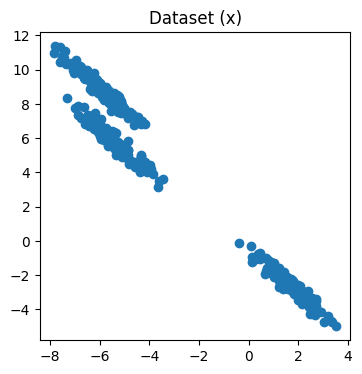

In [4]:
# Codigo para plotear cualquier dataset 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(x[:,0], x[:,1]) # primer columna = valor eje x; segunda columna = valor eje y
ax.set_title("Dataset (x)");

## K-means

In [ ]:
# correr kmeans para varios K y calcular inercias
from sklearn.cluster import KMeans

kmeans_para_varios_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(x) 
                        for k in range(1, 10)]
inercias = [model.inertia_ for model in kmeans_para_varios_k]

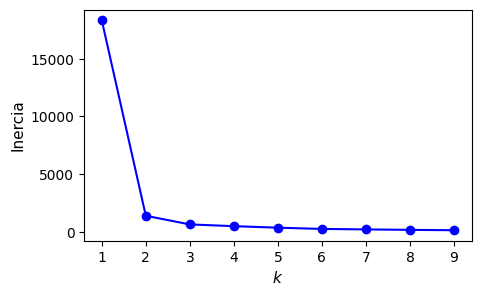

In [ ]:
# plotear inercias
plt.figure(figsize=(5, 3))
plt.plot(range(1, 10), inercias, "bo-")

plt.xlabel("$k$", fontsize=11)
plt.ylabel("Inercia", fontsize=11)

plt.show()

In [ ]:
# calcular scores de siluetas
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(x, model.labels_)
                     for model in kmeans_para_varios_k[1:]]

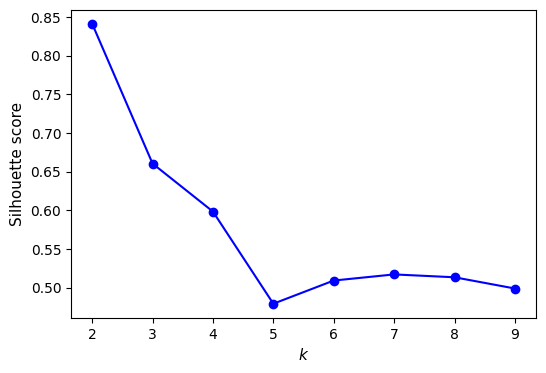

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=11)
plt.ylabel("Silhouette score", fontsize=11)
plt.show()

### Resultados

Una vez analizados los plots de inercias y siluetas, elegir un valor de K, y correr de nuevo K-means con ese valor para poder colorear clusters y fronteras de decision. 

In [ ]:
# Dataset 1
k = 8
model = KMeans(n_clusters=k, n_init=10).fit(x)

In [ ]:
# Dataset 2
k = 8
model = KMeans(n_clusters=k, n_init=10).fit(x)

In [ ]:
# Dataset 3
k = 3
model = KMeans(n_clusters=k, n_init=10).fit(x)

In [ ]:
# Dataset 4
k = 3
model = KMeans(n_clusters=k, n_init=10).fit(x)

In [ ]:
#@title Código para graficar fronteras de decisión
def plot_data(x, marker='.', color='k', ls='', markersize=2, **kwargs):
    plt.plot(x[:, 0], x[:, 1], marker=marker, ls=ls, color=color, markersize=markersize, **kwargs)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], s=35, linewidths=8, color=circle_color, zorder=10, alpha=0.5)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X, markersize=2)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14)
    else:
        plt.tick_params(labelleft=False)

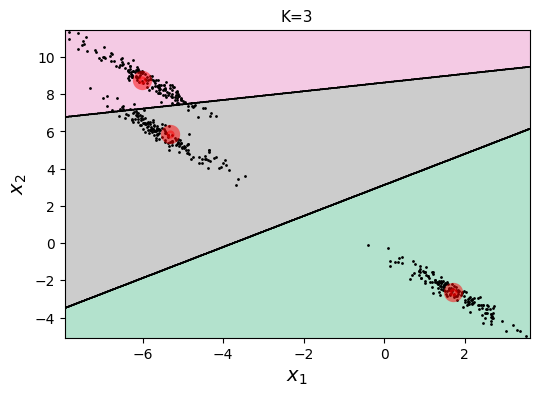

In [ ]:
# plotear fronteras de decision
title = "K=" + str(k)
plt.figure(figsize=(6, 4))
plot_decision_boundaries(model, x)
plt.title(title, fontsize=11)
plt.show()

## DBSCAN 

In [5]:
# correr dbscan para varios valores de epsilon
from sklearn.cluster import DBSCAN
import numpy as np
valores_epsilon = np.arange(0.1, 1.1, 0.01)

# fijamos min_samples!
dbscan_para_varios_eps = [DBSCAN(eps=i, min_samples=10).fit(x) 
                           for i in valores_epsilon]

In [ ]:
len(valores_epsilon)

In [7]:
# calcular scores de siluetas para varios valores de eps
import numpy as np 
from sklearn import metrics

# array numpy vacio para guardar dos valores
# eps, score_silueta
scores_siluetas = np.empty((0,2))

for dbscan in dbscan_para_varios_eps:
  clusters = dbscan.labels_ # numero de clusters
  eps = dbscan.eps          # valor eps

  max_silueta = 0
  # si hay 1 solo cluster al final == no hubo clustering!
  if len(set(clusters)) != 1:
    silueta = metrics.silhouette_score(x, clusters)
    print("Clusters:", len(set(clusters)), "| Epsilon:", round(eps,2))
    nueva_fila = [eps, silueta]
    scores_siluetas = np.vstack((scores_siluetas, nueva_fila))
    # mas valores de calidad del agrupamiento
    # y = clusters (etiquetas) verdaderas, obtenidas de make_blobs
    print(f"Homogeneidad: {metrics.homogeneity_score(y, clusters):.3f}")
    print(f"Completitud: {metrics.completeness_score(y, clusters):.3f}")
    print(f"V-score: {metrics.v_measure_score(y, clusters):.3f}")
    print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, clusters):.3f}")
    print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, clusters):.3f}")
    print(f"Silhouette Score: {metrics.silhouette_score(x, clusters):.3f}")
    print("\n")


Clusters: 2 | Epsilon: 0.1
Homogeneidad: 0.046
Completitud: 0.279
V-score: 0.079
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.076
Silhouette Score: -0.295


Clusters: 3 | Epsilon: 0.11
Homogeneidad: 0.067
Completitud: 0.261
V-score: 0.107
Adjusted Rand Index: 0.008
Adjusted Mutual Information: 0.102
Silhouette Score: -0.626


Clusters: 7 | Epsilon: 0.12
Homogeneidad: 0.177
Completitud: 0.257
V-score: 0.210
Adjusted Rand Index: 0.020
Adjusted Mutual Information: 0.199
Silhouette Score: -0.576


Clusters: 9 | Epsilon: 0.13
Homogeneidad: 0.247
Completitud: 0.260
V-score: 0.253
Adjusted Rand Index: 0.024
Adjusted Mutual Information: 0.241
Silhouette Score: -0.493


Clusters: 10 | Epsilon: 0.14
Homogeneidad: 0.329
Completitud: 0.273
V-score: 0.298
Adjusted Rand Index: 0.040
Adjusted Mutual Information: 0.287
Silhouette Score: -0.391


Clusters: 12 | Epsilon: 0.15
Homogeneidad: 0.424
Completitud: 0.281
V-score: 0.338
Adjusted Rand Index: 0.056
Adjusted Mutual Information: 0.327


Text(0, 0.5, 'Silhouette score')

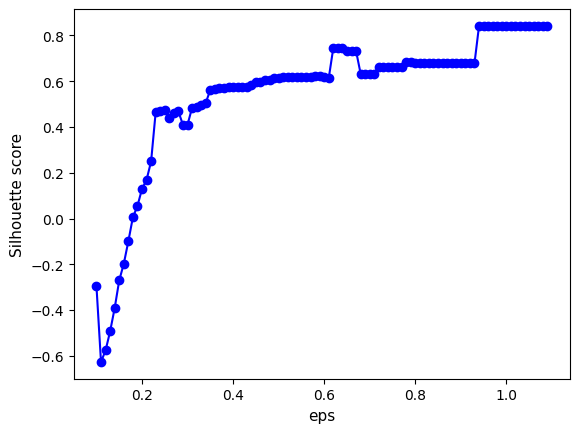

In [8]:
# plotear indices de siluetas
import matplotlib.pyplot as plt

plt.plot(scores_siluetas[:,0], scores_siluetas[:,1], "bo-")
plt.xlabel("eps", fontsize=11)
plt.ylabel("Silhouette score", fontsize=11)

### Resultados

Despues de haber analizado el plot de siluetas elegir un valor de epsilon y volver a correr DBSCAN. Dejar documentado el codigo para cada dataset. Una vez corrido DBSCAN con el mejor valor de epsilon, correr el bloque de codigo abajo para obtener mas metricas de calidad y graficar *core vs noise y densidad*. 

In [ ]:
# correr de nuevo dbscan con el mejor par de parametros que hayamos encontrado
# Dataset
dbscan = DBSCAN(eps=0.25, min_samples=10).fit(x) 
clusters = dbscan.labels_

In [ ]:
# correr de nuevo dbscan con el mejor par de parametros que hayamos encontrado
# Dataset 2
dbscan = DBSCAN(eps=0.19, min_samples=10).fit(x) 
clusters = dbscan.labels_

In [ ]:
# correr de nuevo dbscan con el mejor par de parametros que hayamos encontrado
# Dataset 3
dbscan = DBSCAN(eps=0.8, min_samples=10).fit(x) 
clusters = dbscan.labels_

In [9]:
# correr de nuevo dbscan con el mejor par de parametros que hayamos encontrado
# Dataset 4 - opcion 1 primer plateau
dbscan = DBSCAN(eps=0.1, min_samples=10).fit(x) 
clusters = dbscan.labels_

In [12]:
# correr de nuevo dbscan con el mejor par de parametros que hayamos encontrado
# Dataset 4 - opcion 2 plateau final 
dbscan = DBSCAN(eps=1, min_samples=10).fit(x) 
clusters = dbscan.labels_

In [15]:
# mostrar otras metricas de calidad para el mejor agrupamiento 
from sklearn import metrics
print(f"Homogeneidad: {metrics.homogeneity_score(y, clusters):.3f}")
print(f"Completitud: {metrics.completeness_score(y, clusters):.3f}")
print(f"V-score: {metrics.v_measure_score(y, clusters):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, clusters):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(y, clusters):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(x, clusters):.3f}")

Homogeneidad: 0.580
Completitud: 1.000
V-score: 0.734
Adjusted Rand Index: 0.571
Adjusted Mutual Information: 0.733
Silhouette Coefficient: 0.841


Text(0.5, 1.0, 'Estimated number of clusters: 2')

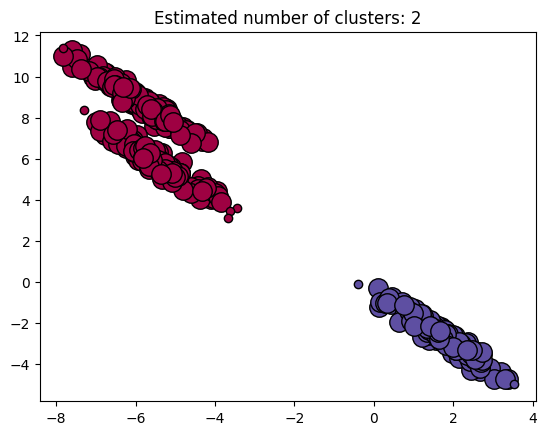

In [14]:
#@title Codigo para graficar core vs noise y densidad
# adaptado de https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

import matplotlib.cm as cm
unique_labels = set(clusters)
core_samples_mask = np.zeros_like(clusters, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = clusters == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")

## RESULTADOS y ANALISIS

### Dataset 1

 - DBSCAN
  - Mejor eps (0.16) da muchos clusters! (ojo hay un pico en score siluetas para este valor de eps!) 
  - Combinar analisis con otras metricas (homogeneidad, completitud, V-Score, etc. &ndash; ver notebook de clase)
  - Clustering OK cuando el score de siluetas se estabiliza para eps >= 0.25 y se maximizan otras metricas de calidad del agrupamiento
  - Discutir que pasa con el indice de siluetas y por qué en este caso particular. Que mide el indice de siluetas? Hay algo raro en la forma en la que están posicionados estos clusters uno con respecto al otro que hace que este score no funcione bien en este caso?
 - K-means
   - Mejor k (8) por siluetas, pero por inercia nunca muestra "codo"
   - Igual el clustering es raro 

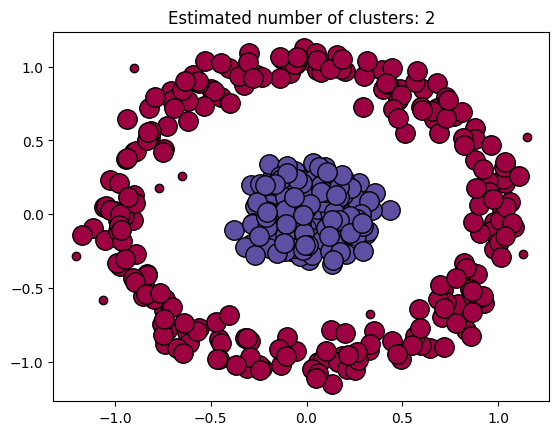

 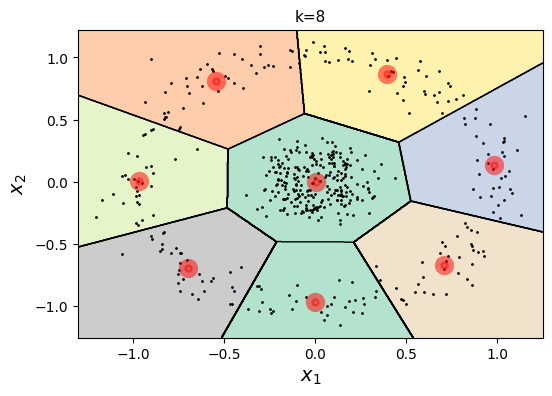

Plot inercias que no muestra "codo" de cambio de pendiente brusco: 

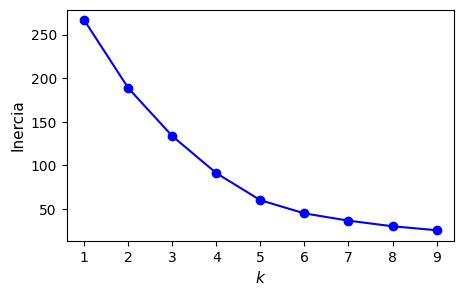

### Dataset 2 

 - K-means
  - idem Dataset 1, mejor k = 8, pero el clustering es raro
 - DBSCAN
  - mejor eps = 0.19 ; min_samples = 10

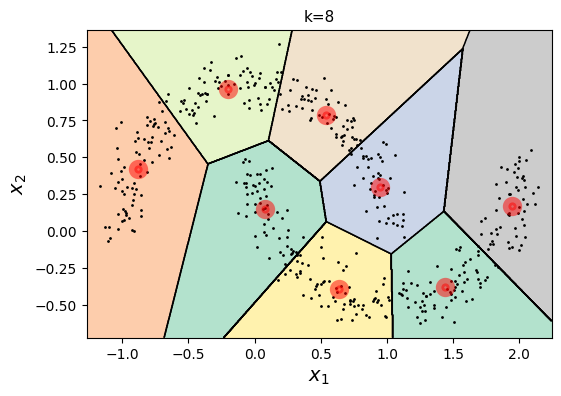

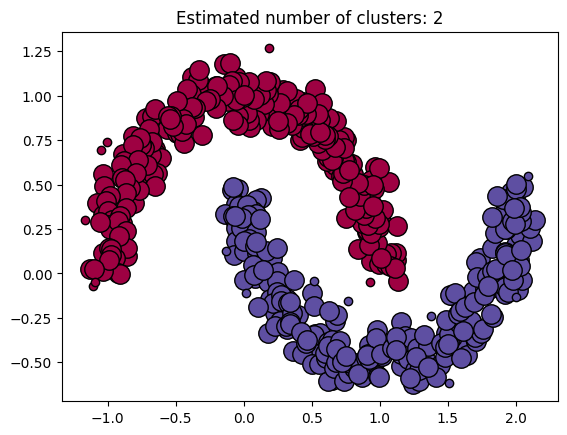

### Dataset 3
 
 - K-means
  - mejor k = 3; clustering OK!
 - DBSCAN
  - mejor eps >= 0.8  ; min:samples = 10; Clustering OK!

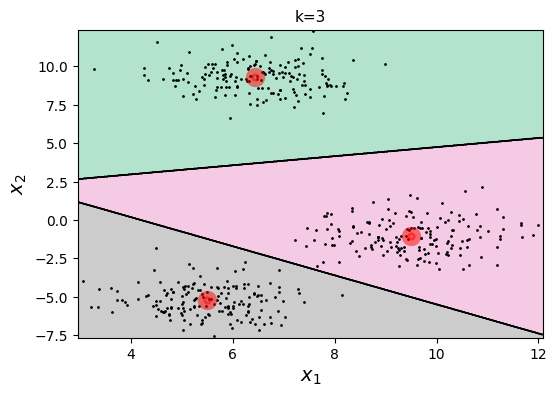

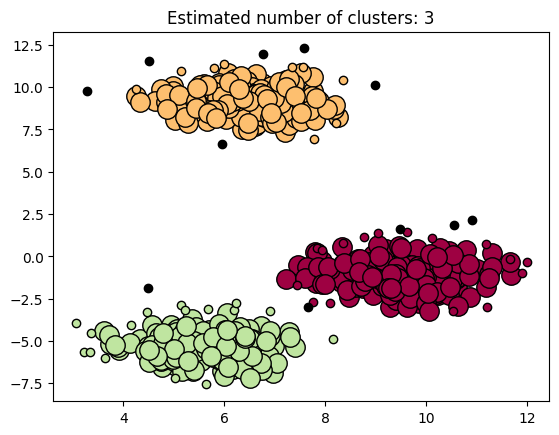


### Dataset 4

 - K-means
  - Está dificil! Análisis de inercia sugiere k=3, siluetas k=2 (los dos tienen sentido!)
  - Ojo con k=3 las fronteras de decision no siguen la direccion/forma de los clusters!

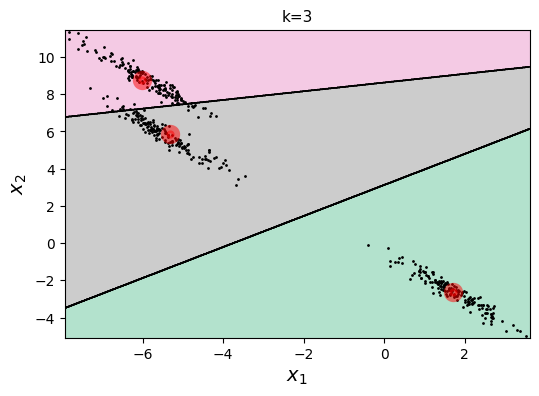

 - DBSCAN
  - Idem, Analisis de siluetas muestra que el mejor eps = >0.9 (dos clusters), pero la curva de score de siluetas sube sostenido y logra un primer plateau alrededor de 0.3-0.4 y ahi logra discriminar 3 clusters. 
  - qué nos dicen las otras métricas? (homogeneidad, completitud, V-score, etc?) todas coinciden en que valores de eps alrededor de 0.35 funcionan mejor (tres clusters!). 

```
Homogeneidad: 0.910
Completitud: 0.768
V-score: 0.833
Adjusted Rand Index: 0.859
Adjusted Mutual Information: 0.832
```

 Plot de scores de inercias:

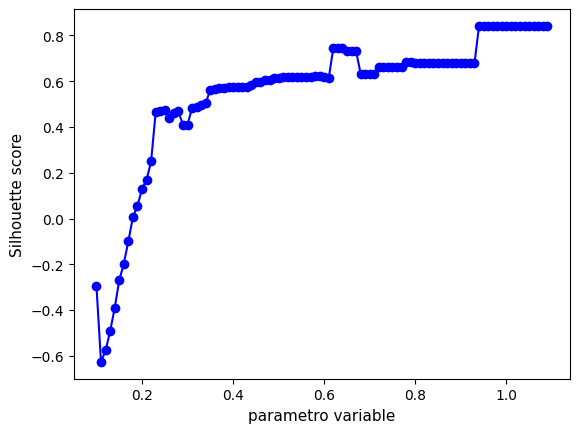

 Plot para eps=0.35:
  
  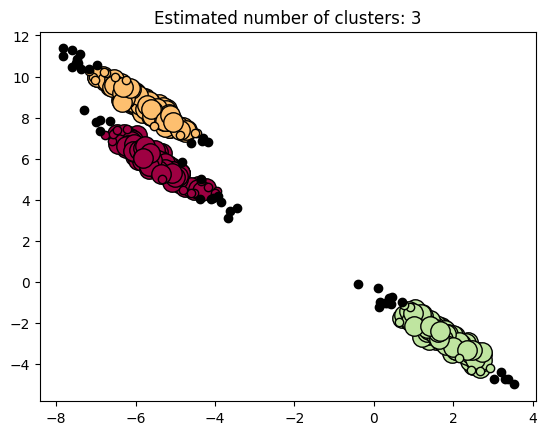

  Plot para eps=1.0:

  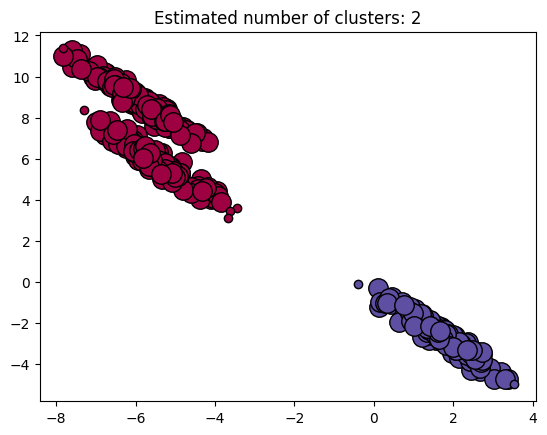


### Dataset 5

No tiene sentido hacer clustering con este dataset. No hay *a priori* estructura alguna en los datos. 

# APENDICE

Codigo para hacer con DBSCAN la evaluacion de varios valores de min_samples (fijando UN valor de epsilon). 

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# fijar un valore de epsilon
# ej para Dataset 1
eps = 0.16

# correr DBSCAN para un rango de valores de min_samples
dbscan_para_varios_min_samples = [DBSCAN(eps=eps, min_samples=ms).fit(x) for ms in range(5, 50, 5)]
                          

In [ ]:
# calcular scores de siluetas para cada valor de min_sample
import numpy as np 
from sklearn import metrics

# array numpy vacio para guardar dos valores
# eps, score_silueta
scores_siluetas = np.empty((0,2))

for dbscan in dbscan_para_varios_min_samples:
  clusters = dbscan.labels_ # numero de clusters
  min_samples = dbscan.min_samples          # valor min:samples

  # si hay 1 solo cluster al final == no hubo clustering!
  if len(set(clusters)) != 1:
    silueta = metrics.silhouette_score(x, clusters)
    print("S:", round(silueta,2), "C:", len(set(clusters)), round(min_samples,2))
    nueva_fila = [min_samples, silueta]
    scores_siluetas = np.vstack((scores_siluetas, nueva_fila))

In [ ]:
# plotear indices de siluetas
import matplotlib.pyplot as plt

plt.plot(scores_siluetas[:,0], scores_siluetas[:,1], "bo-")
plt.xlabel("min_samples", fontsize=11)
plt.ylabel("Silhouette score", fontsize=11)